In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [4]:
pip install -i https://test.pypi.org/simple/ my_krml_25383389==2024.0.1.1


Looking in indexes: https://test.pypi.org/simple/
  Using cached https://test-files.pythonhosted.org/packages/dd/79/0e0e4f9b217dfbe0a433bd308a6158d301aea6ae3deb85670873ecc68c2f/my_krml_25383389-2024.0.1.1-py3-none-any.whl.metadata (1.2 kB)
Using cached https://test-files.pythonhosted.org/packages/dd/79/0e0e4f9b217dfbe0a433bd308a6158d301aea6ae3deb85670873ecc68c2f/my_krml_25383389-2024.0.1.1-py3-none-any.whl (5.3 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
from my_krml_25383389.data.sets import load_sets

X_train, y_train, X_val, y_val, X_test, y_test = load_sets()

In [7]:
df_train = pd.DataFrame(X_train, columns=['ds'])
df_train['y'] = y_train

In [8]:
df_val = pd.DataFrame(X_val, columns=['ds'])
df_val['y'] = y_val

# 3. Train Prophet Model with Default Hyperparameters

In [9]:
import numpy as np
np.float_ = np.float64

In [11]:
pip install prophet


  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 2.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.2 MB/s eta 0:00:00a 0:00:01
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 3.0 MB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
from prophet import Prophet

/Users/leigh/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-1-VeJhQQ1S-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib is building the font cache; this may take a moment.
Importing plotly failed. Interactive plots will not work.


In [13]:
prophet = Prophet()

In [14]:
prophet.fit(df_train)

16:30:24 - cmdstanpy - INFO - Chain [1] start processing
16:30:24 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
from joblib import dump

dump(prophet,  '../models/prophet_default.joblib')

['../models/prophet_default.joblib']

In [16]:
forecast = prophet.predict(df_val)

/Users/leigh/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-1-VeJhQQ1S-py3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/leigh/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-1-VeJhQQ1S-py3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


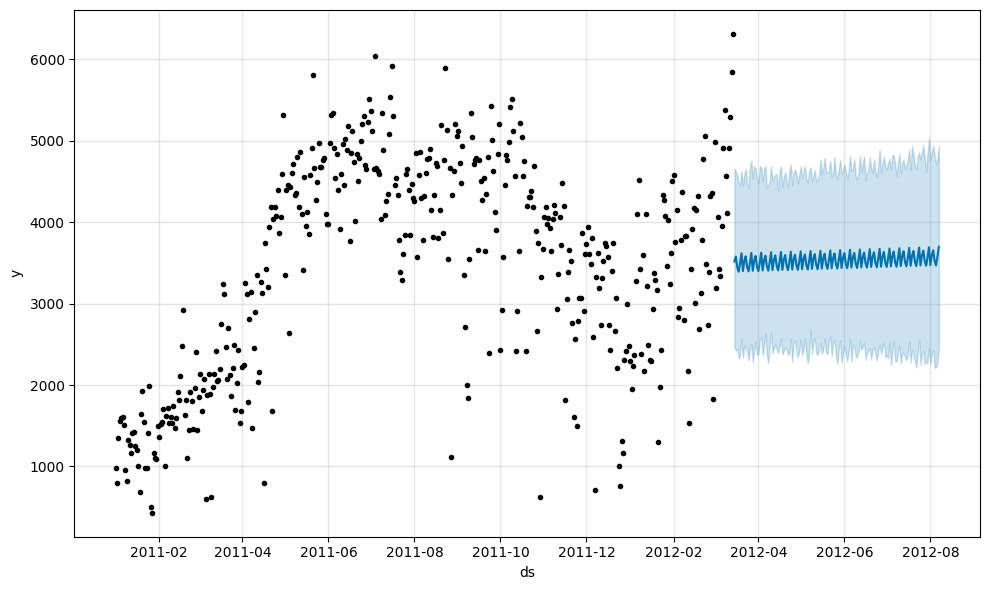

In [17]:
fig1 = prophet.plot(forecast)

/Users/leigh/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-1-VeJhQQ1S-py3.12/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


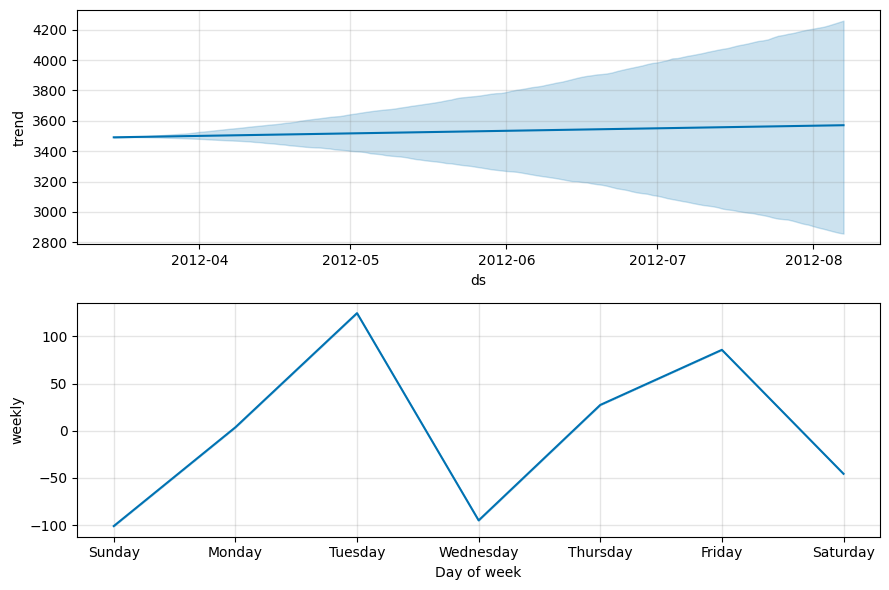

In [18]:
fig2 = prophet.plot_components(forecast)

In [19]:
from my_krml_25383389.models.performance import print_regressor_scores

In [21]:
print_regressor_scores(forecast['yhat'], df_val['y'], set_name='Validation')

RMSE Validation: 3016.3016044420247
MAE Validation: 2855.822784536118


# 4. Train Prophet Model with Cross Validation

In [23]:
prophet_df = pd.read_csv('../data/interim/day_prophet.csv')

In [24]:
from prophet.diagnostics import cross_validation

In [25]:
cv_results = cross_validation(prophet, initial='365 days', period='7 days', horizon='7 days')

  0%|                                                    | 0/10 [00:00<?, ?it/s]16:32:20 - cmdstanpy - INFO - Chain [1] start processing
16:32:20 - cmdstanpy - INFO - Chain [1] done processing
16:32:20 - cmdstanpy - INFO - Chain [1] start processing
16:32:20 - cmdstanpy - INFO - Chain [1] done processing
 20%|████████▊                                   | 2/10 [00:00<00:00, 16.00it/s]16:32:20 - cmdstanpy - INFO - Chain [1] start processing
16:32:20 - cmdstanpy - INFO - Chain [1] done processing
16:32:20 - cmdstanpy - INFO - Chain [1] start processing
16:32:20 - cmdstanpy - INFO - Chain [1] done processing
 40%|█████████████████▌                          | 4/10 [00:00<00:00, 16.33it/s]16:32:20 - cmdstanpy - INFO - Chain [1] start processing
16:32:20 - cmdstanpy - INFO - Chain [1] done processing
16:32:20 - cmdstanpy - INFO - Chain [1] start processing
16:32:20 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████████████████████████▍                 | 6/10 [00:00<00:00, 14.19it/s]16

In [26]:
from prophet.diagnostics import performance_metrics
metrics_results = performance_metrics(cv_results)
metrics_results

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,2.079161e+06,1441.929624,1261.764266,0.287983,0.299426,0.347427,0.4
1,2 days,8.408332e+05,916.969586,805.406578,0.204773,0.208389,0.234072,0.6
2,3 days,1.241272e+06,1114.123942,945.478919,0.321880,0.299783,0.310370,0.4
3,4 days,7.787795e+05,882.484830,714.871776,0.261406,0.183496,0.247671,0.8
4,5 days,1.014885e+06,1007.414956,805.678468,0.214552,0.183004,0.240257,0.7
5,6 days,2.063650e+06,1436.541149,1280.990171,0.290569,0.287378,0.349055,0.4
6,7 days,3.182050e+06,1783.830092,1523.532058,0.360133,0.426003,0.429220,0.4


In [27]:
from prophet.plot import plot_cross_validation_metric

/Users/leigh/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-1-VeJhQQ1S-py3.12/lib/python3.12/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/leigh/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-1-VeJhQQ1S-py3.12/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


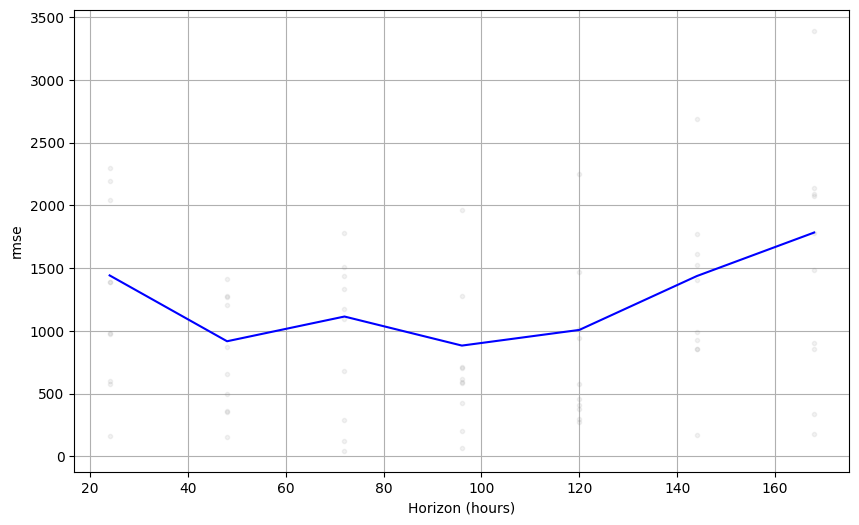

In [28]:
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')

# 5. Train Prophet Model witih Holidays

In [29]:
prophet1 = Prophet()

In [30]:
prophet1.add_country_holidays(country_name='US')

In [31]:
prophet1.fit(prophet_df)

16:33:37 - cmdstanpy - INFO - Chain [1] start processing
16:33:37 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
dump(prophet1,  '../models/prophet_holiday.joblib')

['../models/prophet_holiday.joblib']